In [1]:
# Header:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from decimal import Decimal

def format_e(n):
    a = '%e' % Decimal(n)
    return a.split('e')[0].rstrip('0').rstrip('.')+'e'+a.split('e')[1]

Startwert der Kreisfrequenz: 
omega_0 [Hz] = 6.791995e+01  +-  1.653924e-01
Chi-Quadrat = 0.2262760874189914
Freiheitsgrade = 5
Chi-Quadrat reduziert = 0.04525521748379828
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 100.0 %


Dämpfungskonstante: 
k [Hz] = 6.600142e-04  +-  6.605926e-06


Halbwertszeit: 
T_halb [s] = 1.0502e+03  +-  1.051121e+01


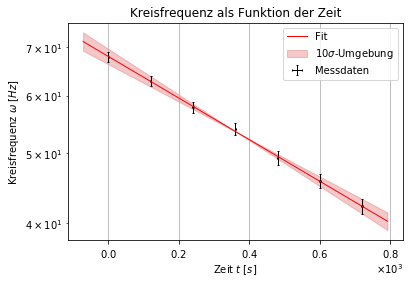

In [2]:
#Aufgabe 2

# Messwerte aus Tabelle \ref{tab:Tab1} in SI Einheiten:
t = np.array([0,120,240,360,480,600,720]) # Zeit [s]
Fehler_t = np.array([2,2,2,2,2,2,2])

f = np.array([648,600,552,515,470,437,403]) /60 # Frequenz [Hz]
Fehler_f = np.array([10,10,10,10,10,10,10]) /60

omega = 2*np.pi*f # Kreisfrequenz [Hz]
Fehler_omega = 2*np.pi*Fehler_f
                    
#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (A, k) = p #A: Startwert, k: Dämpfungskonstante
    return A*np.exp(-k*x)

model = odr.Model(fit_func)

#darzustellende Daten
x = t
y = omega
delta_x = Fehler_t
delta_y = Fehler_omega

#Startparameter
para0 = [1, 0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 10 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,3), useMathText=True)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Kreisfrequenz als Funktion der Zeit')
plt.grid(True)
plt.yscale('log')
plt.xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
plt.ylabel('Kreisfrequenz '+r'${\omega}$'+' '+r'${[Hz]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

plt.savefig('figures/213_Fig1.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = out.sum_square
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
omega_0 = popt[0]
Fehler_omega_0 = perr[0]

k = popt[1]
Fehler_k = perr[1]

T_halb = np.log(2)/k
Fehler_T_halb = T_halb*Fehler_k/k

#Ausgabe
print('Startwert der Kreisfrequenz: ')
print('omega_0 [Hz] =', format_e(omega_0), ' +- ', format_e(Fehler_omega_0))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')
print('\n')                    
print('Dämpfungskonstante: ')
print('k [Hz] =',  format_e(k), ' +- ',  format_e(Fehler_k))
print('\n')
print('Halbwertszeit: ')
print('T_halb [s] =',  format_e(T_halb), ' +- ',  format_e(Fehler_T_halb))

lineare Steigungen: 
S_1 [s^2] = 1.465235e+00  +-  1.366893e-02
Chi-Quadrat = 8.120624052429571
Freiheitsgrade = 5
Chi-Quadrat reduziert = 1.6241248104859143
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 15.0 %


S_2 [s^2] = 1.965064e+00  +-  1.134583e-02
Chi-Quadrat = 0.8421813756024409
Freiheitsgrade = 2
Chi-Quadrat reduziert = 0.42109068780122044
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 66.0 %


S_3 [s^2] = 7.224199e-01  +-  4.304101e-03
Chi-Quadrat = 0.7948108139557275
Freiheitsgrade = 2
Chi-Quadrat reduziert = 0.39740540697786375
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 67.0 %


S_4 [s^2] = 9.780491e-01  +-  1.114486e-02
Chi-Quadrat = 2.8383188936144617
Freiheitsgrade = 2
Chi-Quadrat reduziert = 1.4191594468072308
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 24.0 %




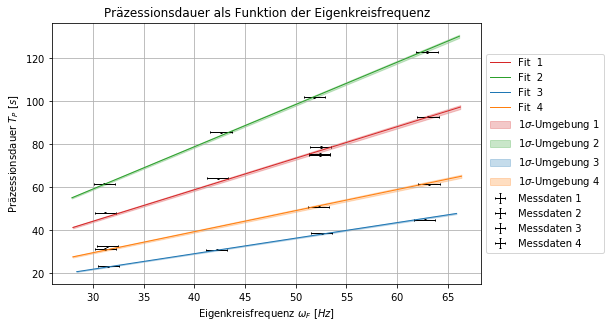

In [3]:
#Aufgabe 3b Teil 1

#Messwerte aus Tabelle 2 und 3: T_P über f_F, l und m
f_F = np.array([500,500,500,298,404,501,602,297,407,495,601,599,502,403,301,603,499,300,298]) /60 # Eigenfrequenz [Hz]
Fehler_f_F = np.full(f_F.size, 10) /60

T_P = np.array([74.80,75.00,75.39,47.90,64.00,78.50,92.51,61.46,85.31,101.56,122.67,44.76,
                38.28,30.72,23.04,61.06,50.67,32.23,31.06]) # Präzessionsdauer [s]
Fehler_T_P = np.full(T_P.size, 0.30)

omega_F = 2*np.pi*f_F # Eigenkreisfrequenz [Hz]
Fehler_omega_F = 2*np.pi*Fehler_f_F
                  
#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (s) = p #s: lineare Steigung
    return s*x

model = odr.Model(fit_func)

#darzustellende Daten
x_1 = omega_F[0:7]
y_1 = T_P[0:7]
delta_x_1 = Fehler_omega_F[0:7]
delta_y_1 = Fehler_T_P[0:7]

x_2 = omega_F[7:11]
y_2 = T_P[7:11]
delta_x_2 = Fehler_omega_F[7:11]
delta_y_2 = Fehler_T_P[7:11]

x_3 = omega_F[11:15]
y_3 = T_P[11:15]
delta_x_3 = Fehler_omega_F[11:15]
delta_y_3 = Fehler_T_P[11:15]

x_4 = omega_F[15:19]
y_4 = T_P[15:19]
delta_x_4 = Fehler_omega_F[15:19]
delta_y_4 = Fehler_T_P[15:19]

#Startparameter
para0 = [1]

data_1 = odr.RealData(x_1, y_1, sx=delta_x_1, sy=delta_y_1)
odr_1 = odr.ODR(data_1, model, beta0=para0 )
out_1 = odr_1.run()

data_2 = odr.RealData(x_2, y_2, sx=delta_x_2, sy=delta_y_2)
odr_2 = odr.ODR(data_2, model, beta0=para0 )
out_2 = odr_2.run()

data_3 = odr.RealData(x_3, y_3, sx=delta_x_3, sy=delta_y_3)
odr_3 = odr.ODR(data_3, model, beta0=para0 )
out_3 = odr_3.run()

data_4 = odr.RealData(x_4, y_4, sx=delta_x_4, sy=delta_y_4)
odr_4 = odr.ODR(data_4, model, beta0=para0 )
out_4 = odr_4.run()

#1-Sigma
popt_1 = out_1.beta
perr_1 = out_1.sd_beta

popt_2 = out_2.beta
perr_2 = out_2.sd_beta

popt_3 = out_3.beta
perr_3 = out_3.sd_beta

popt_4 = out_4.beta
perr_4 = out_4.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top_1 = popt_1+nstd*perr_1
popt_bot_1 = popt_1-nstd*perr_1

popt_top_2 = popt_2+nstd*perr_2
popt_bot_2 = popt_2-nstd*perr_2

popt_top_3 = popt_3+nstd*perr_3
popt_bot_3 = popt_3-nstd*perr_3

popt_top_4 = popt_4+nstd*perr_4
popt_bot_4 = popt_4-nstd*perr_4

#Plot-Umgebung
x_fit_1 = np.linspace(min(x_1)-(max(x_1)-min(x_1))/10, max(x_1)+(max(x_1)-min(x_1))/10, 1000)
fit_1 = fit_func(popt_1, x_fit_1)
fit_top_1 = fit_func(popt_top_1, x_fit_1)
fit_bot_1 = fit_func(popt_bot_1, x_fit_1)

x_fit_2 = np.linspace(min(x_2)-(max(x_2)-min(x_2))/10, max(x_2)+(max(x_2)-min(x_2))/10, 1000)
fit_2 = fit_func(popt_2, x_fit_2)
fit_top_2 = fit_func(popt_top_2, x_fit_2)
fit_bot_2 = fit_func(popt_bot_2, x_fit_2)

x_fit_3 = np.linspace(min(x_3)-(max(x_3)-min(x_3))/10, max(x_3)+(max(x_3)-min(x_3))/10, 1000)
fit_3 = fit_func(popt_3, x_fit_3)
fit_top_3 = fit_func(popt_top_3, x_fit_3)
fit_bot_3 = fit_func(popt_bot_3, x_fit_3)

x_fit_4 = np.linspace(min(x_4)-(max(x_4)-min(x_4))/10, max(x_4)+(max(x_4)-min(x_4))/10, 1000)
fit_4 = fit_func(popt_4, x_fit_4)
fit_top_4 = fit_func(popt_top_4, x_fit_4)
fit_bot_4 = fit_func(popt_bot_4, x_fit_4)

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 *1.5, 4.8])
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,3), useMathText=True)
plt.errorbar(x_1, y_1, yerr=delta_y_1, xerr=delta_x_1, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten 1')
plt.errorbar(x_2, y_2, yerr=delta_y_2, xerr=delta_x_2, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten 2')
plt.errorbar(x_3, y_3, yerr=delta_y_3, xerr=delta_x_3, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten 3')
plt.errorbar(x_4, y_4, yerr=delta_y_4, xerr=delta_x_4, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten 4')
plt.title('Präzessionsdauer als Funktion der Eigenkreisfrequenz')
plt.grid(True)
plt.xlabel('Eigenkreisfrequenz '+r'${\omega_F}$'+' '+r'${[Hz]}$')
plt.ylabel('Präzessionsdauer '+r'${T_P}$'+' '+r'${[s]}$')
plt.plot(x_fit_1, fit_1, color='C3', lw=1, label='Fit  1')
plt.plot(x_fit_2, fit_2, color='C2', lw=1, label='Fit  2')
plt.plot(x_fit_3, fit_3, color='C0', lw=1, label='Fit  3')
plt.plot(x_fit_4, fit_4, color='C1', lw=1, label='Fit  4')
ax.fill_between(x_fit_1, fit_top_1, fit_bot_1, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung 1')
ax.fill_between(x_fit_2, fit_top_2, fit_bot_2, color='C2', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung 2')
ax.fill_between(x_fit_3, fit_top_3, fit_bot_3, color='C0', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung 3')
ax.fill_between(x_fit_4, fit_top_4, fit_bot_4, color='C1', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung 4')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('figures/213_Fig2.pdf', format='pdf', bbox_inches='tight')

#Auswertung
S_1 = popt_1[0]
Fehler_S_1 = perr_1[0]
S_2 = popt_2[0]
Fehler_S_2 = perr_2[0]
S_3 = popt_3[0]
Fehler_S_3 = perr_3[0]
S_4 = popt_4[0]
Fehler_S_4 = perr_4[0]

#Chi-Quadrat orthogonal
dof_1 = x_1.size-popt.size
chisquare_1 = out_1.sum_square
chisquare_red_1 = chisquare_1/dof_1
prob_1 = round(1-chi2.cdf(chisquare_1,dof_1),2)*100

dof_2 = x_2.size-popt.size
chisquare_2 = out_2.sum_square
chisquare_red_2 = chisquare_2/dof_2
prob_2 = round(1-chi2.cdf(chisquare_2,dof_2),2)*100

dof_3 = x_3.size-popt.size
chisquare_3 = out_3.sum_square
chisquare_red_3 = chisquare_3/dof_3
prob_3 = round(1-chi2.cdf(chisquare_3,dof_3),2)*100

dof_4 = x_4.size-popt.size
chisquare_4 = out_4.sum_square
chisquare_red_4 = chisquare_4/dof_4
prob_4 = round(1-chi2.cdf(chisquare_4,dof_4),2)*100

#Ausgabe
print('lineare Steigungen: ')
print('S_1 [s^2] =', format_e(S_1), ' +- ', format_e(Fehler_S_1))
print('Chi-Quadrat =', chisquare_1)
print('Freiheitsgrade =', dof_1)
print('Chi-Quadrat reduziert =', chisquare_red_1)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob_1, '%')
print('\n')
print('S_2 [s^2] =', format_e(S_2), ' +- ', format_e(Fehler_S_2))
print('Chi-Quadrat =', chisquare_2)
print('Freiheitsgrade =', dof_2)
print('Chi-Quadrat reduziert =', chisquare_red_2)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob_2, '%')
print('\n')
print('S_3 [s^2] =', format_e(S_3), ' +- ', format_e(Fehler_S_3))
print('Chi-Quadrat =', chisquare_3)
print('Freiheitsgrade =', dof_3)
print('Chi-Quadrat reduziert =', chisquare_red_3)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob_3, '%')
print('\n')
print('S_4 [s^2] =', format_e(S_4), ' +- ', format_e(Fehler_S_4))
print('Chi-Quadrat =', chisquare_4)
print('Freiheitsgrade =', dof_4)
print('Chi-Quadrat reduziert =', chisquare_red_4)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob_4, '%')
print('\n')

Trägheitsmoment: 
I_z [kg * m^2] = 4.490859e-03  +-  2.207146e-05
Chi-Quadrat = 3.162438468024628
Freiheitsgrade = 3
Chi-Quadrat reduziert = 1.0541461560082093
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 37.0 %


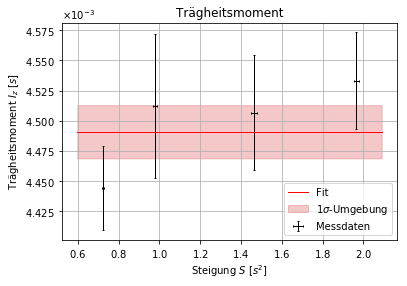

In [4]:
#Aufgabe 3b Teil 2
S = np.array([S_1,S_2,S_3,S_4])
Fehler_S = np.array([Fehler_S_1,Fehler_S_2,Fehler_S_3,Fehler_S_4])

l = np.array([20,15,20,15]) /1e2 # Stablänge [m]
Fehler_l = np.full(l.size, 0.1) /1e2

n =  np.array([1,1,2,2])

m_G = 9.85 /1e3 
Fehler_m_G = 0.01 /1e3

g = 9.80984 # Erdbeschleunigung [m/s^2]
Fehler_g = 0.00002

m = n*m_G
Fehler_m = np.sqrt(n)* Fehler_m_G

I_z = m*g*l*S/(2*np.pi)
Fehler_I_z = abs(I_z)*np.sqrt((Fehler_m/m)**2+(Fehler_g/g)**2+(Fehler_l/l)**2+(Fehler_S/S)**2)



#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (c) = p #I: Trägheitsmoment
    return x*0+c

model = odr.Model(fit_func)

#darzustellende Daten
x = S
y = I_z
delta_x = Fehler_S
delta_y = Fehler_I_z

#Startparameter
para0 = [0]
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()


#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,3), useMathText=True)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Trägheitsmoment')
plt.grid(True)
plt.xlabel('Steigung '+r'${S}$'+' '+r'${[s^2]}$')
plt.ylabel('Trägheitsmoment '+r'${I_z}$' + ' '+r'${[s]}$')
plt.plot(x_fit, fit, color='r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

plt.savefig('figures/213_Fig3.pdf', format='pdf', bbox_inches='tight')

#Auswertung
I_z = popt[0]
Fehler_I_z = perr[0]

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = out.sum_square
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print('Trägheitsmoment: ')
print('I_z [kg * m^2] =', format_e(I_z), ' +- ', format_e(Fehler_I_z))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Steigung:
S_Farb = 5.54362e-02  +-  3.58525e-04
Chi-Quadrat = 1.8131534915537362
Freiheitsgrade = 9
Chi-Quadrat reduziert = 0.20146149906152624
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 99.0 %


1.Messmethode:
I_x_1 [kg * m^2] = 4.754426e-03  +-  2.343641e-05


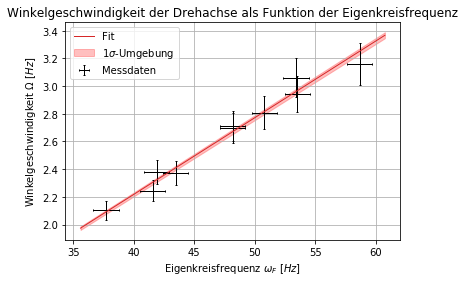

In [8]:
#Aufgabe 4a

#Messwerte aus Tabelle 5: T_Farbe über f_F
f_F = np.array([485,360,511,397,460,415,560,510,460,400]) /60 # Eigenfrequenz [Hz]
Fehler_f_F = np.full(f_F.size, 10) /60

T_10 = np.array([22.37,29.90,21.37,28.01,23.29,26.48,19.89,20.53,23.17,26.42]) # Periode vom Farbwechsel [s]
Fehler_T_10 = np.full(T_Farbe.size, 0.30)

T_Farbe = T_10/10 # Periode vom Farbwechsel [s]
Fehler_T_Farbe = nFehler_T_10 /10

omega_F = 2*np.pi*f_F # Eigenkreisfrequenz [Hz]
Fehler_omega_F = 2*np.pi*Fehler_f_F

Omega = 2*np.pi/T_Farbe # Winkelgeschwindigkeit der Drehachse [Hz]
Fehler_Omega = 2*np.pi*Omega*Fehler_T_Farbe/T_Farbe

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (s) = p #I: Trägheitsmoment
    return x*s

model = odr.Model(fit_func)

#darzustellende Daten
x = omega_F
y = Omega
delta_x = Fehler_omega_F
delta_y = Fehler_Omega

#Startparameter
para0 = [1]
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()


#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Winkelgeschwindigkeit der Drehachse als Funktion der Eigenkreisfrequenz')
plt.grid(True)
plt.xlabel('Eigenkreisfrequenz '+r'${\omega_F}$'+' '+r'${[Hz]}$')
plt.ylabel('Winkelgeschwindigkeit '+r'${\Omega}$'+' '+r'${[Hz]}$')
plt.plot(x_fit, fit, color='C3', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='r', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

plt.savefig('figures/213_Fig4.pdf', format='pdf', bbox_inches='tight')

#Auswertung
S_Farb = popt[0]
Fehler_S_Farb = perr[0]

I_x_1 = I_z/(1-S_Farb)
Fehler_I_x_1 = abs(I_x_1)*np.sqrt((Fehler_I_z/I_z)**2+(Fehler_S_Farb/(1-S_Farb))**2)

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = out.sum_square
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print('Steigung:')
print('S_Farb =', format_e(S_Farb), ' +- ', format_e(Fehler_S_Farb))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')
print('\n')
print('1.Messmethode:')
print('I_x_1 [kg * m^2] =', format_e(I_x_1), ' +- ', format_e(Fehler_I_x_1))

Steigung: 
S_N = 9.474419e-01  +-  6.580497e-03
Chi-Quadrat = 13.315446247417999
Freiheitsgrade = 9
Chi-Quadrat reduziert = 1.4794940274908888
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 15.0 %


2.Messmethode: 
I_x [kg * m^2] = 4.739983e-03  +-  4.033036e-05


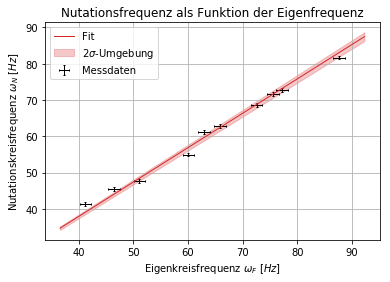

In [10]:
#Aufgabe 4a

#Messwerte aus Tabelle 6: f_N über f_F
f_F = np.array([693,601,444,574,488,837,737,722,394,629]) /60 # Eigenfrequenz [Hz]
Fehler_f_F = np.full(f_F.size, 10) /60

f_N = np.array([655,585,435,525,455,780,695,685,395,600]) /60 # Nutationsfrequenz [Hz]
Fehler_f_N = np.full(T_Farbe.size, 5) /60

omega_F = 2*np.pi*f_F # Eigenkreisfrequenz [Hz]
Fehler_omega_F = 2*np.pi*Fehler_f_F

omega_N = 2*np.pi*f_N # Nutationskreisfrequenz [Hz]
Fehler_omega_N = 2*np.pi*Fehler_f_N

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (s) = p #I: Trägheitsmoment
    return x*s

model = odr.Model(fit_func)

#darzustellende Daten
x = omega_F
y = omega_N
delta_x = Fehler_omega_F
delta_y = Fehler_omega_N

#Startparameter
para0 = [1]
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()


#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 2 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Nutationsfrequenz als Funktion der Eigenfrequenz')
plt.grid(True)
plt.xlabel('Eigenkreisfrequenz '+r'${\omega_F}$'+' '+r'${[Hz]}$')
plt.ylabel('Nutationskreisfrequenz '+r'${\omega_N}$'+' '+r'${[Hz]}$')
plt.plot(x_fit, fit, color='C3', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

plt.savefig('figures/213_Fig5.pdf', format='pdf', bbox_inches='tight')

#Auswertung
S_N = popt[0]
Fehler_S_N = perr[0]

I_x_2 = I_z/S_N
Fehler_I_x_2 = abs(I_x_2)*np.sqrt((Fehler_I_z/I_z)**2+(Fehler_S_N/S_N)**2)

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = out.sum_square
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print('Steigung: ')
print('S_N =', format_e(S_N), ' +- ', format_e(Fehler_S_N))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')
print('\n')
print('2.Messmethode: ')
print('I_x [kg * m^2] =', format_e(I_x_2), ' +- ', format_e(Fehler_I_x_2))
